# Querying viral sequences with the Malva Index

## 1. Login and Connecting to the Malva Index

From the previous notebook `00_setup_malva_client.ipynb`, paste here the `API_TOKEN` you got from us, or if you login with ORCID, generate a new one from your user profile in [https://malva.mdc-berlin.de](https://malva.mdc-berlin.de)

In [ ]:
API_TOKEN = "" # put your API token here

Then, you are ready to use the `malva_client`

In [2]:
import dnaio
from malva_client import MalvaClient
from malva_client.tools import mask_sequence
import matplotlib.pyplot as plt

client = MalvaClient("https://malva.mdc-berlin.de", API_TOKEN)

INFO:malva_client.client:Connected to Malva API: healthy
INFO:malva_client.client:Authenticated successfully: free account


## 2. Querying the Malva Index

We will proceed similarly to `01_expression_analysis.ipynb`; this time, we focus on searching for the sequence of SARS-CoV-2 across
the entire Malva Index.

In [3]:
sequences = {}
for sid in ['covid']:
    with dnaio.open(f"{sid}.fna") as f_in:
        for s in f_in:
            sequences[sid] = s.sequence
            break

In [4]:
results = {}

for sid, seq in sequences.items():
    seq = mask_sequence(seq)
    results[sid] = client.search(seq)

INFO:malva_client.client:Search completed with job ID: cdb27240-30a0-4a02-84f6-b3ab9707474e


In [5]:
for rid, result in results.items():
    result.enrich_with_metadata()

✓ Enriched with metadata for 2 samples (1,752 total cells)
✓ Extracted sample counts per cell type: 11 cell types


In [6]:
results

{'covid': 🔬 Malva Search Results
 📊 Total cells: 1,752
 📊 Sample/cell_type combinations: 16
 🧬 Genes/sequences: 1
 🧪 Samples: 2
 🔬 Cell types: 11
 📈 Expression range: 0.098 - 1.103
 📊 Mean expression: 0.497
 
 ✅ Enriched with sample metadata
 🏷️  Available metadata: organ, disease, species, study
 
 🔍 Available methods:
    • .filter_by(organ='brain', disease='normal')
    • .aggregate_by('cell_type')
    • .plot_expression_by('organ')
    • .available_filter_fields()}

Most of the cells/samples positive for this search query are, indeed, lung cells/samples.

/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = (self._df.groupby(group_by)['norm_expr']
/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:422: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = plot_data.groupby(group_by)['cell_count'].sum().reindex(top_categories)



📊 Summary for Cell Type:
--------------------------------------------------
alveolar_epithelial_cell: 1 samples, 337 cells, μ=1.103
epithelial_cell: 2 samples, 253 cells, μ=0.696
goblet_cell: 2 samples, 225 cells, μ=0.654
mast_cell: 1 samples, 182 cells, μ=0.604
clara_cell: 1 samples, 47 cells, μ=0.545
basal_cell: 2 samples, 263 cells, μ=0.492
unknown: 2 samples, 128 cells, μ=0.424
tuft_cell: 1 samples, 50 cells, μ=0.329
inflammatory_macrophage: 1 samples, 90 cells, μ=0.234
squamous_epithelial_cell: 2 samples, 104 cells, μ=0.217


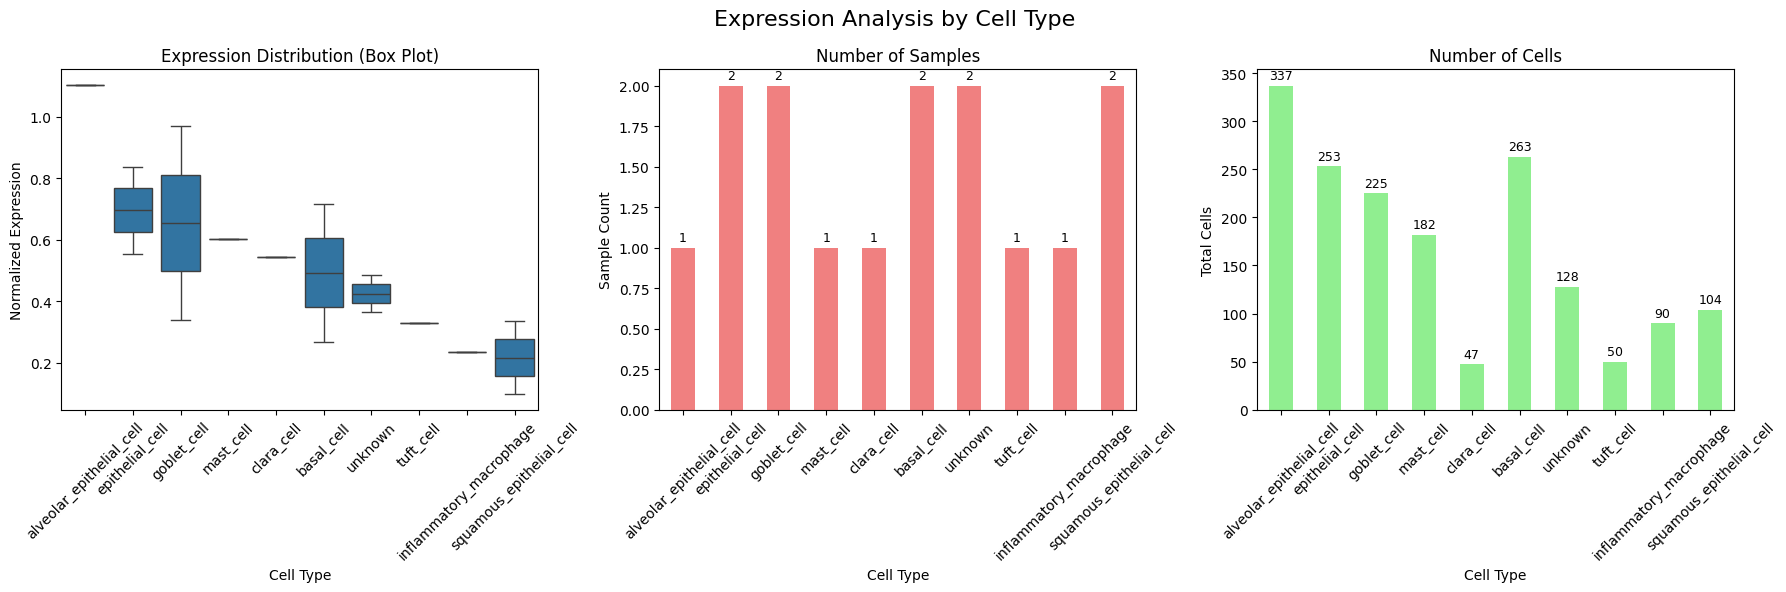

In [7]:
fig = results['covid'].plot_expression_summary("cell_type")

/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = (self._df.groupby(group_by)['norm_expr']
/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:422: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = plot_data.groupby(group_by)['cell_count'].sum().reindex(top_categories)



📊 Summary for Organ:
--------------------------------------------------
lung: 2 samples, 1,752 cells, μ=0.497


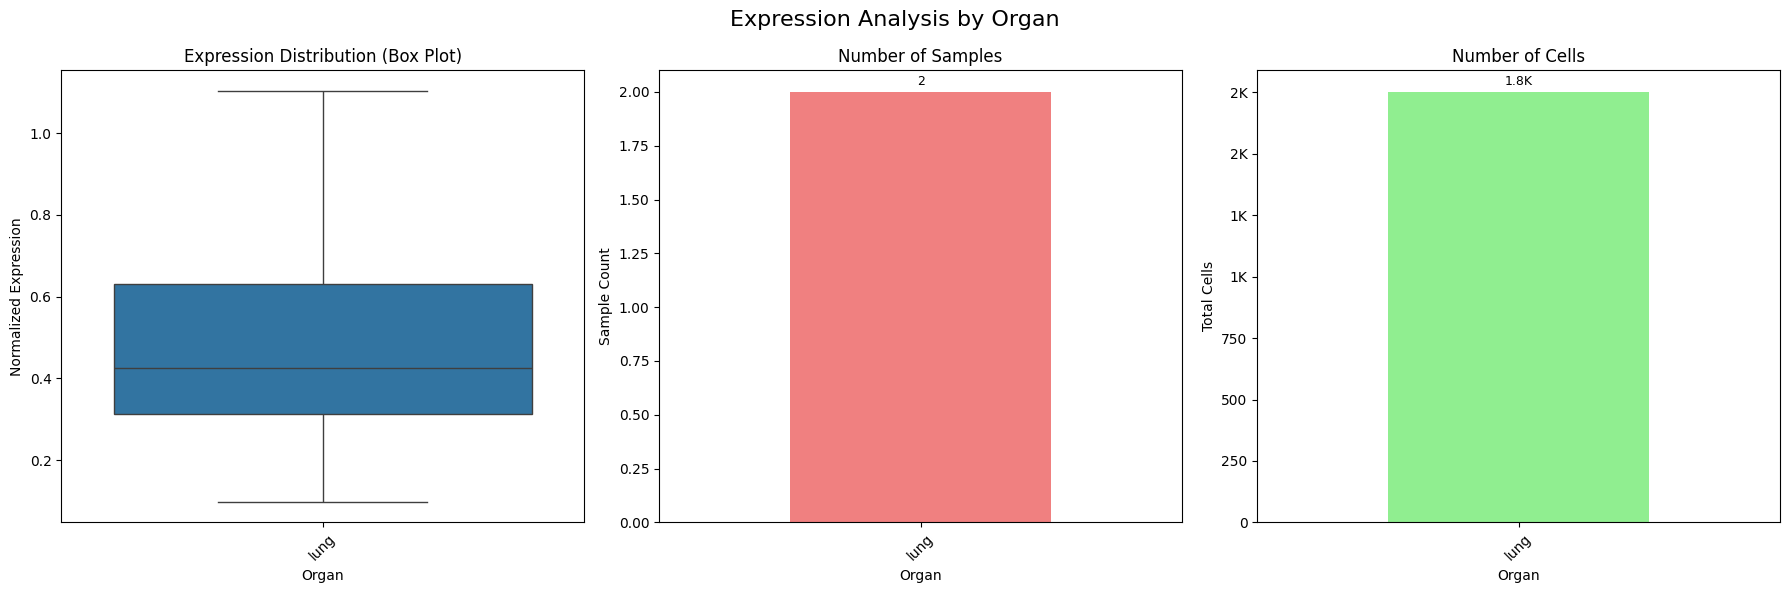

In [8]:
fig = results['covid'].plot_expression_summary("organ")